In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("input"))

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


In [2]:
# Load training and test data
train = pd.read_csv("input/fashion-mnist_train.csv")
test = pd.read_csv("input/fashion-mnist_test.csv")

In [3]:
train = train.values
test = test.values
np.random.shuffle(train)
np.random.shuffle(test)
X = train[:,1:].reshape(-1, 28, 28, 1) / 255.0
y = train[:,0].astype(np.int32)

In [10]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [5]:
# Perform one-hot encoding of label values
num_classes=10

y = to_categorical(y, num_classes=num_classes)

In [6]:
# Creating the CNN as a sequence
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))

In [7]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
fitted_model = model.fit(X, y, validation_split=0.33, epochs=15, batch_size=32)
print(fitted_model)

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 24s 595us/step - loss: 0.5121 - acc: 0.8123 - val_loss: 0.4012 - val_acc: 0.8513
Epoch 2/15
40199/40199 [==============================] - 21s 520us/step - loss: 0.3583 - acc: 0.8691 - val_loss: 0.3383 - val_acc: 0.8757
Epoch 3/15
40199/40199 [==============================] - 21s 519us/step - loss: 0.3122 - acc: 0.8840 - val_loss: 0.3494 - val_acc: 0.8747
Epoch 4/15
40199/40199 [==============================] - 21s 521us/step - loss: 0.2762 - acc: 0.8974 - val_loss: 0.3561 - val_acc: 0.8697
Epoch 5/15
40199/40199 [==============================] - 21s 522us/step - loss: 0.2467 - acc: 0.9068 - val_loss: 0.3352 - val_acc: 0.8770
Epoch 6/15
40199/40199 [==============================] - 21s 521us/step - loss: 0.2222 - acc: 0.9179 - val_loss: 0.3582 - val_acc: 0.8728
Epoch 7/15
40199/40199 [==============================] - 21s 520us/step - loss: 0.2010 - acc: 0.9251 - val_loss: 0.

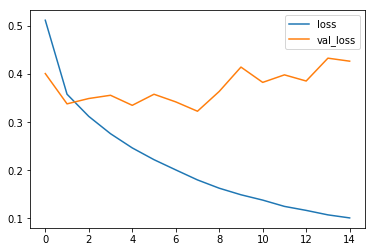

In [11]:
# Plot training and validation loss
plt.plot(fitted_model.history['loss'], label='loss')
plt.plot(fitted_model.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

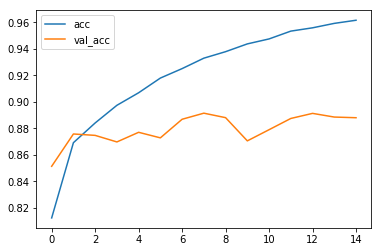

In [12]:
# Plot training and validation accuracy
plt.plot(fitted_model.history['acc'], label='acc')
plt.plot(fitted_model.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [27]:
X_test = test[:,1:].reshape(-1, 28, 28, 1) / 255.0
y_test = test[:,0].astype(np.int32)
y_test = to_categorical(y_test, num_classes=num_classes)

In [32]:
test_model = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 124us/step


In [40]:
print("On Test Data:")
print(model.metrics_names[0] + " = {}".format(test_model[0]))
print(model.metrics_names[1] + " = {}".format(test_model[1]))

On Test Data:
loss = 0.407653029859066
acc = 0.8907


In [89]:
mapping = {
    "0" : "T-shirt/top",
    "1" : "Trouser",
    "2" : "Pullover",
    "3" : "Dress",
    "4" : "Coat",
    "5" : "Sandal",
    "6" : "Shirt",
    "7" : "Sneaker",
    "8" : "Bag",
    "9" : "Ankle boot"
}

Predicted as Shirt


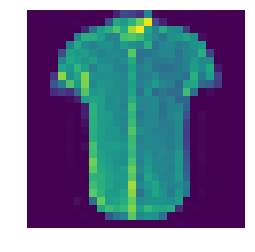

In [95]:
# Visualizing results
plt.imshow(X_test[89].reshape(28,28))
plt.axis('off')
plt.figure(figsize=(28,28))
class_val = np.argmax(model.predict(X_test[89].reshape(-1,28,28,1)))
print("Predicted as {}".format(mapping[str(class_val)]))